In [1]:
# Import necessary libraries
from preprocess import get_prepared_data
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load preprocessed, prepared, relabelled data
X, y = get_prepared_data()

# Split for train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
# Train SVM model
svm_model = SVC(kernel='rbf', C=69)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9780509218612818

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       915
           1       0.97      0.92      0.94       224

    accuracy                           0.98      1139
   macro avg       0.97      0.96      0.96      1139
weighted avg       0.98      0.98      0.98      1139



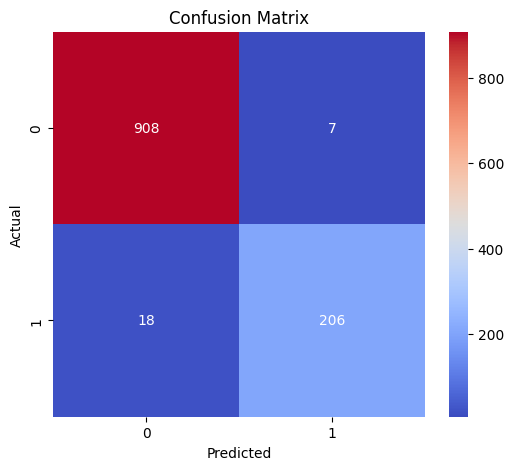

In [8]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True , cmap = "coolwarm",fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test,y_pred)


In [6]:
# Save the trained model and scaler
def save_model():
    with open('../trained/svm_model.pkl', 'wb') as file:
        pickle.dump(svm_model, file)

    # with open("../trained/scaler.pkl", "wb") as file:
    #     pickle.dump(scaler, file)

save_model()